<h2>リッジ回帰を使って解析する</h2>

In [23]:
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split 

In [24]:
data=pd.read_table('train.tsv',encoding = 'utf-8')


C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [25]:
df = pd.DataFrame(data)

In [26]:
df.columns

Index(['id', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
id              199 non-null int64
mpg             199 non-null float64
cylinders       199 non-null int64
displacement    199 non-null float64
horsepower      199 non-null object
weight          199 non-null float64
acceleration    199 non-null float64
model year      199 non-null int64
origin          199 non-null int64
car name        199 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 15.6+ KB


In [28]:
char_change = lambda x: str(x).replace('?','')
df.horsepower = pd.to_numeric(df.horsepower.map(char_change))

In [29]:
df

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel
5,16,27.0,4,151.0,90.0,2735.0,18.0,82,1,pontiac phoenix
6,18,16.0,6,250.0,105.0,3897.0,18.5,75,1,chevroelt chevelle malibu
7,19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega
8,23,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw 2002
9,24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge st. regis


In [30]:
df.groupby('car name').size()

car name
amc ambassador brougham              1
amc ambassador dpl                   1
amc concord d/l                      1
amc concord dl                       1
amc gremlin                          3
amc hornet                           3
amc matador                          2
amc pacer                            1
amc pacer d/l                        1
amc rebel sst                        1
amc spirit dl                        1
audi 4000                            1
audi 5000s (diesel)                  1
bmw 2002                             1
bmw 320i                             1
buick century                        2
buick century limited                1
buick century special                1
buick lesabre custom                 1
buick regal sport coupe (turbo)      1
buick skyhawk                        1
buick skylark limited                1
capri ii                             1
chevroelt chevelle malibu            1
chevrolet camaro                     1
chevrolet capric

In [31]:
#車名が多い、かつ、まとまりがないので捨てる
df = df.drop(['car name'],axis = 1)  #列はaxis =1

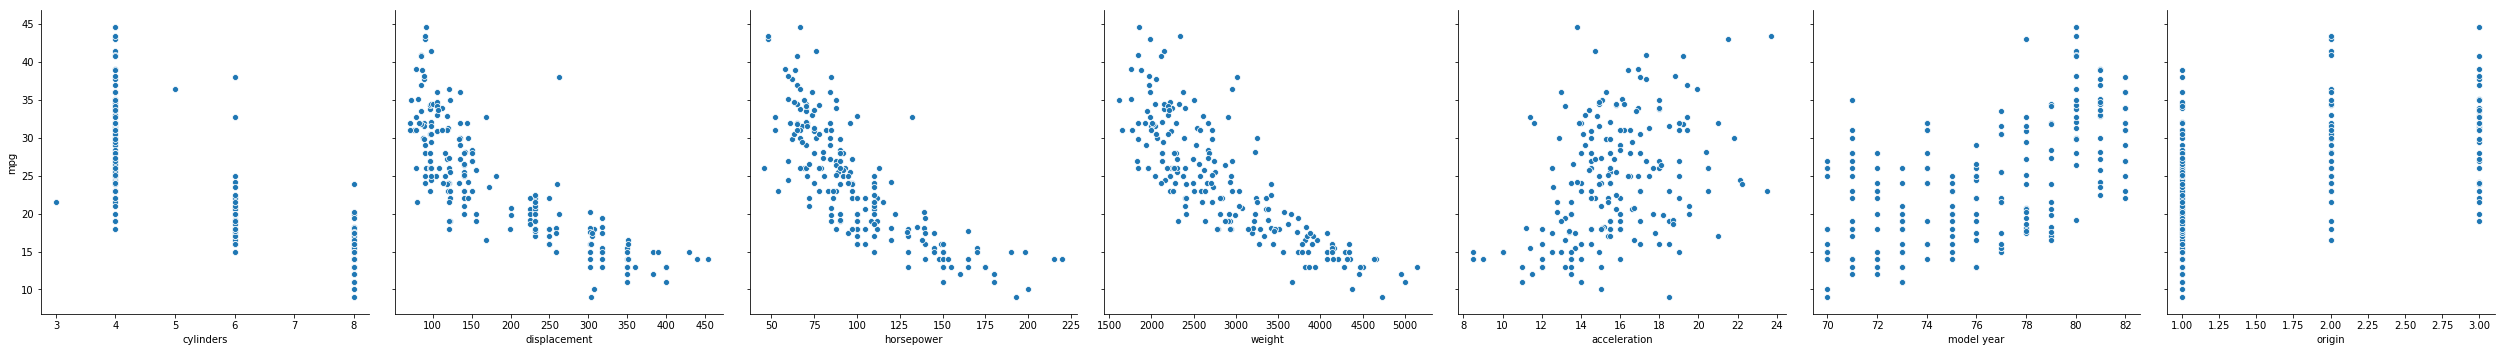

In [32]:
sns.pairplot(df,height = 5, x_vars=[ 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],y_vars='mpg')

In [33]:
df.groupby('cylinders').size()

cylinders
3      1
4    112
5      1
6     41
8     44
dtype: int64

In [34]:
df.corr()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
id,1.000000,-0.052688,0.103419,0.098416,0.083254,0.070563,-0.087649,-0.093272,-0.031421
mpg,-0.052688,1.000000,-0.770160,-0.804635,-0.791419,-0.820660,0.379721,0.568471,0.533671
cylinders,0.103419,-0.770160,1.000000,0.950600,0.851572,0.893256,-0.479561,-0.303462,-0.497373
displacement,0.098416,-0.804635,0.950600,1.000000,0.894965,0.933038,-0.523955,-0.329817,-0.579805
horsepower,0.083254,-0.791419,0.851572,0.894965,1.000000,0.872336,-0.661741,-0.384597,-0.421929
weight,0.070563,-0.820660,0.893256,0.933038,0.872336,1.000000,-0.401757,-0.265562,-0.535893
acceleration,-0.087649,0.379721,-0.479561,-0.523955,-0.661741,-0.401757,1.000000,0.194854,0.189193
model year,-0.093272,0.568471,-0.303462,-0.329817,-0.384597,-0.265562,0.194854,1.000000,0.124279
origin,-0.031421,0.533671,-0.497373,-0.579805,-0.421929,-0.535893,0.189193,0.124279,1.000000


以上より
'cylinders', 'displacement', 'horsepower', 'weight',
        'model year', 'origin'
        
がmpgと相関ありそうと分かった

<h4>NEXT >> 欠損値をどうするか</h4>

In [35]:
df.isnull().sum()

id              0
mpg             0
cylinders       0
displacement    0
horsepower      4
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

horesepowerにNaNがある(しかも4つ)

In [36]:
df.shape

(199, 9)

In [37]:
df=df.dropna()

In [38]:
df.shape

(195, 9)

In [39]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']]

y = df['mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

In [40]:
model = Ridge()

In [41]:
model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
model.score(X_train,y_train)

0.8400856685393248

In [43]:
model.score(X_test,y_test)

0.7908911175217135

In [44]:
model.coef_

array([-0.46479715,  0.01970157, -0.0206681 , -0.00742725,  0.8266336 ,
        1.25010748])

In [45]:
A = model.coef_

In [46]:
B=model.intercept_
print(B)

-18.419830141504725


In [47]:
data_test=pd.read_table('test.tsv',encoding = 'utf-8')

df_test = pd.DataFrame(data_test)

C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [48]:
df_test 

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,2,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,6,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)
5,7,4,107.0,90.00,2430.0,14.5,70,2,audi 100 ls
6,8,8,318.0,150.0,4190.0,13.0,76,1,dodge coronet brougham
7,10,6,231.0,105.0,3425.0,16.9,77,1,buick skylark
8,12,4,151.0,88.00,2740.0,16.0,77,1,pontiac sunbird coupe
9,14,6,232.0,90.00,3210.0,17.2,78,1,amc concord


In [49]:
df_test_X = df_test[['cylinders', 'displacement', 'horsepower', 'weight',
        'model year', 'origin']]

print(df_test_X.shape)
print(A.shape)
print(B.shape)

(199, 6)
(6,)
()


In [50]:
df_test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
cylinders       199 non-null int64
displacement    199 non-null float64
horsepower      199 non-null object
weight          199 non-null float64
model year      199 non-null int64
origin          199 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.4+ KB


In [51]:
df_test_X.horsepower = pd.to_numeric(df_test_X.horsepower.map(char_change))
df_test.horsepower = pd.to_numeric(df_test.horsepower.map(char_change))

C:\Users\mkou0\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


df_test_X = df_test_X.dropna()
df_test =df_test.dropna()

In [52]:
print(df_test_X.shape)
print(A.shape)
print(B.shape)
print(df_test.shape)

(199, 6)
(6,)
()
(199, 9)


In [53]:
A[0]

-0.4647971519038811

In [54]:
df_test['mpg'] = df_test_X['cylinders']*A[0]+df_test_X['displacement']*A[1]+df_test_X['weight']*A[3]+df_test_X['model year']*A[4]+df_test_X['origin']*A[5]+B

In [55]:
df_test

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,1,6,145.0,76.0,3160.0,19.6,81,2,volvo diesel,27.635548
1,2,6,250.0,98.0,3525.0,19.0,77,1,ford granada,22.436626
2,4,4,119.0,92.0,2434.0,15.0,80,3,datsun 510 hatchback,33.868557
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw),21.815978
4,6,4,97.0,88.0,2100.0,16.5,72,3,toyota corolla 1600 (sw),29.302755
5,7,4,107.0,90.0,2430.0,14.5,70,2,audi 100 ls,24.145404
6,8,8,318.0,150.0,4190.0,13.0,76,1,dodge coronet brougham,17.080985
7,10,6,231.0,105.0,3425.0,16.9,77,1,buick skylark,22.805021
8,12,4,151.0,88.0,2740.0,16.0,77,1,pontiac sunbird coupe,27.246154
9,14,6,232.0,90.0,3210.0,17.2,78,1,amc concord,25.248214


In [56]:
df_test[['id','mpg']].to_csv('./submit.csv',header=False,index=False)